# Das mathematische Pendel

In [1]:
var('t,x,y')
k = 1
VektorFeld = vector([y,-k*sin(x)])

Das mathematische Pendel lässt sich durch die Differentialgleichung zweiter Ordnung
\begin{align*}\ddot x = -k\sin(x).\end{align*}
beschreiben. Lösungen sind Funktionen der Form $I \to \mathbb{R}$ für ein Intervall $I$.

In [2]:
@interact
def plot_solution(t_1=18.0,x_0=slider(-4,4,0.1,default=0),v_0=slider(0,3,0.1,default=1)):
    Anfangsbedingung = [0,RR(x_0),RR(v_0)] # Startzeit, Startauslenkung, Startgeschwindigkeit
    Endzeitpunkt=t_1
    NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
    graphics_array([list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick),
    list_plot([(i,k) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$\\dot x$'],
              color=colors.royalblue)]).show()

Interactive function <function plot_solution at 0x7f8a2b91b550> with 3 widgets
  t_1: FloatSlider(value=18.0, …

## Differentialgleichungssystem und Vektorfeld

Setzen wir $y=\dot x$, so erhalten wir
das 2-dimensionale Differentialgleichungssystem
\begin{align*}\dot x &= y,\\ \dot y &= -k\sin(x).\end{align*}

Die Abbildung $\mathbb{R} \mapsto \mathbb{R},\; \begin{pmatrix}x \\ y\end{pmatrix} \mapsto \begin{pmatrix} y \\ -\sin(x)\end{pmatrix}$ definiert ein Vektorfeld.

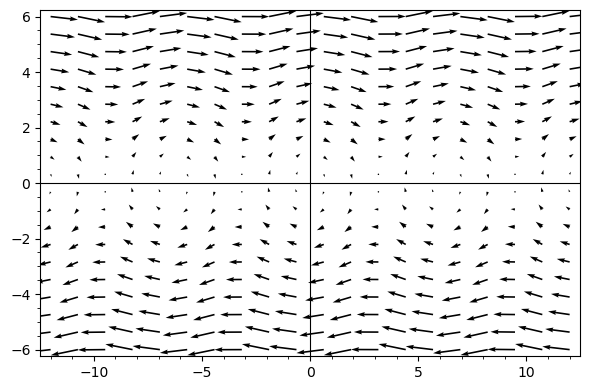

In [4]:
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-6,6))
FieldPlot.show()

## Einige Lösungskurven

Lösungen des obigen Differentialgleichungssystems sind Kurven im $\mathbb{R}^2$, also Abbildungen der Form $I \to \mathbb{R}^2$ für ein Intervall $\mathbb{R}$. Die folgende Abbildung zeigt die **Bilder** einiger dieser Kurven.

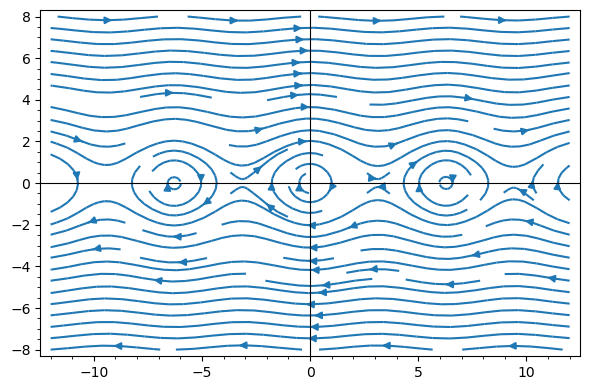

In [5]:
StreamPlot = streamline_plot(tuple(VektorFeld), (x,-12,12), (y,-8,8)) #,color=(0.1,0.1,0.1,0.1))
StreamPlot.show()

Betrachten wir noch einige Lösungen nahe dem Ursprung.

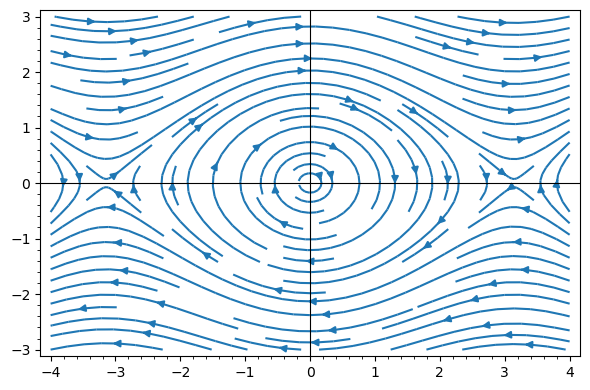

In [7]:
StreamPlot2 = streamline_plot(tuple(VektorFeld), (x,-4,4), (y,-3,3)) #,color=(0.1,0.1,0.1,0.1))
StreamPlot2.show()

Diese Kurven sind tangential zum Vektorfeld.

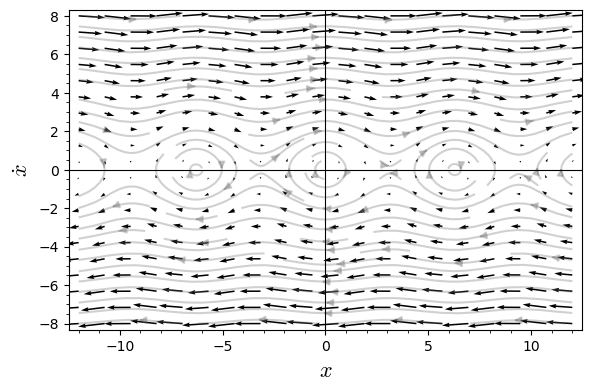

In [8]:
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt=9
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), (x,-12,12), (y,-8,8),color=(0.4,0.4,0.4,0.3))
MainPlot =  StreamPlot3 + FieldPlot2
MainPlot.show(axes_labels=['$x$', '$\\dot x$'])

Zur besseren Übersicht normieren wir noch die Vektoren des Vektorfeldes.

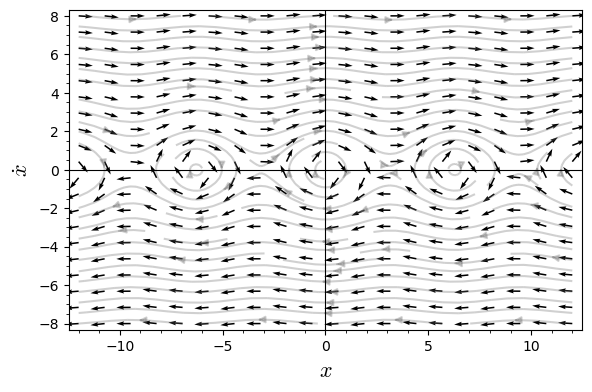

In [9]:
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt=9
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
FieldPlot2 = plot_vector_field(VektorFeld.normalized(),(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), (x,-12,12), (y,-8,8),color=(0.4,0.4,0.4,0.3))
MainPlot =  StreamPlot3 + FieldPlot2
MainPlot.show(axes_labels=['$x$', '$\\dot x$'])

## Eine spezielle Lösung

Zunächst das Bild der Kurve.

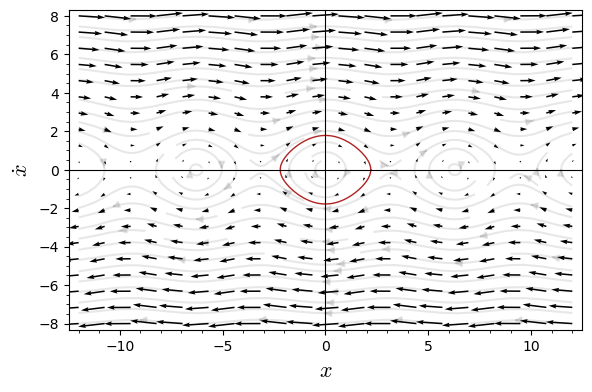

In [10]:
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt=9
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), (x,-12,12), (y,-8,8),color=(0.1,0.1,0.1,0.1))
MainPlot =  StreamPlot3 + FieldPlot2 + ParPlot
MainPlot.show(axes_labels=['$x$', '$\\dot x$'])

Wie können die Lösung auch animieren.

Animation with 91 frames
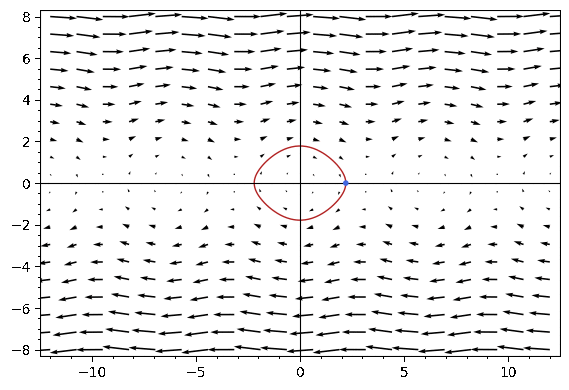

In [11]:
frames=[FieldPlot2 + ParPlot+circle((x,y),0.1,fill=True,color=colors.royalblue) for (z,x,y) in NumSoln]
a=animate(frames)
a.show()

Die Taylorentwicklung von $\sin(x)$ in $0$ ergibt sich wie folgt:

In [12]:
taylor(sin(x),x,0,10)

1/362880*x^9 - 1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x

Für kleine Auslenkungen $x$ können wir unsere Differentialgleichung also approximieren durch $\ddot x = -kx$,
oder als System ausgedrückt, 
\begin{align*}\dot x &= y,\\ \dot y &= -kx.\end{align*}

Für kleine Auslenkungen sind die Lösungen noch sehr ähnlich:

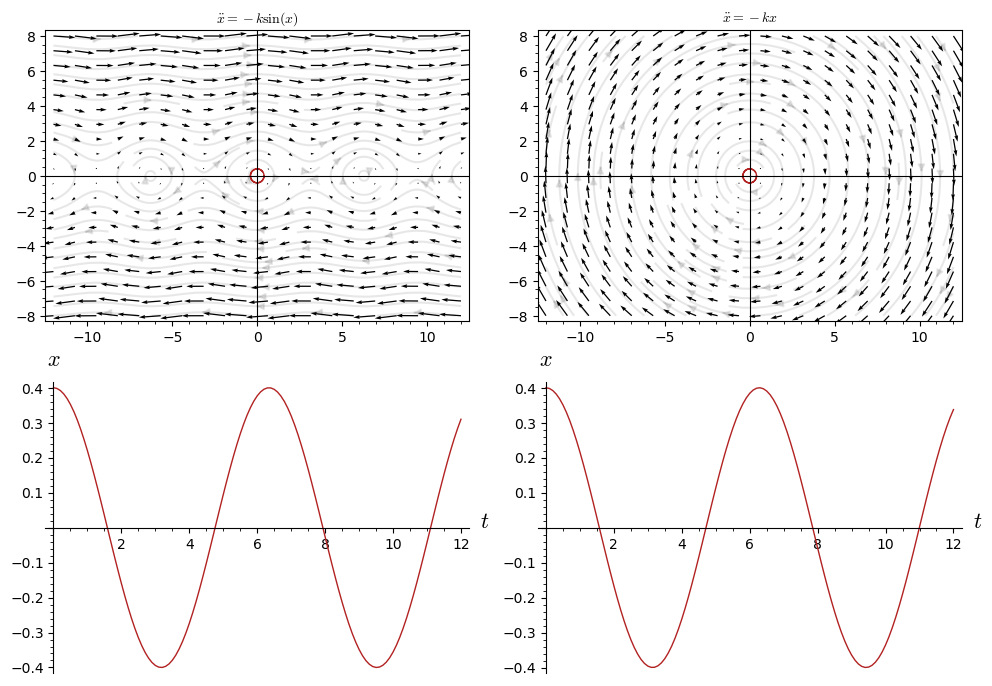

In [13]:
Anfangsbedingung = [0,0.4,0]
Endzeitpunkt=12

VektorFeld = vector([y,-k*sin(x)])
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), 
                              (x,-12,12), 
                              (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k \\sin(x)$")
OrigVektorPlot =  StreamPlot3 + FieldPlot2 + ParPlot
OrigPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick,)

VektorFeld = vector([y,-k*x])
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), 
                              (x,-12,12), (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k x$")
LinVektorPlot =  StreamPlot3 + FieldPlot2 + ParPlot
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)

graphics_array([OrigVektorPlot,LinVektorPlot,OrigPlot,LinPlot],nrows=2).show(figsize=(10,7))


Für große Auslenkungen eher nicht:

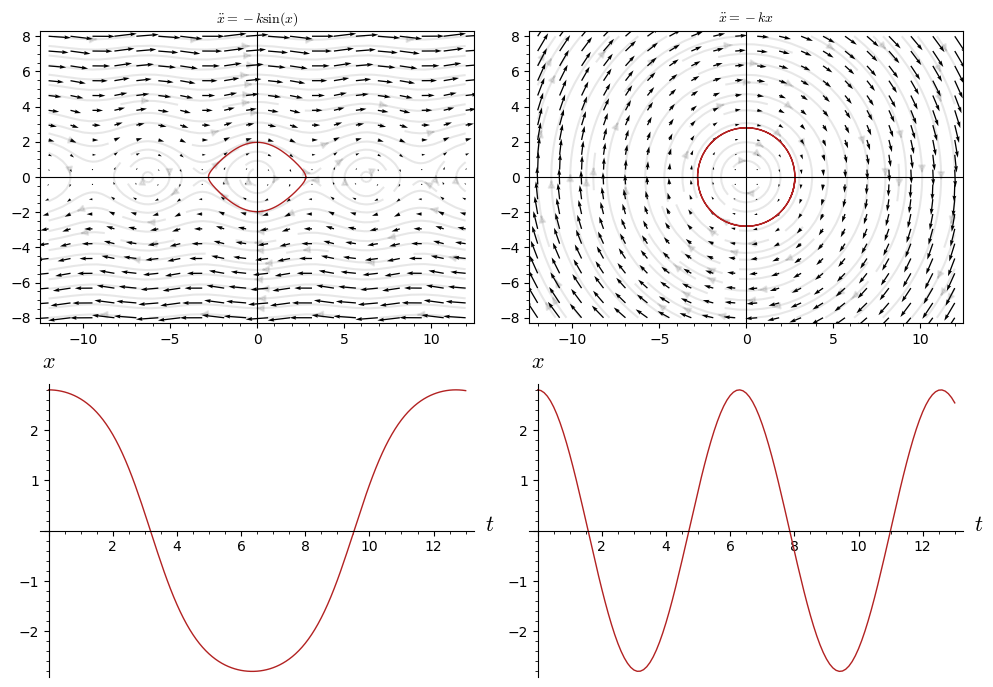

In [14]:
Anfangsbedingung = [0,2.8,0]
Endzeitpunkt=13

VektorFeld = vector([y,-k*sin(x)])
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), 
                              (x,-12,12), 
                              (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k \\sin(x)$")
OrigVektorPlot =  StreamPlot3 + FieldPlot2 + ParPlot
OrigPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick,)

VektorFeld = vector([y,-k*x])
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), 
                              (x,-12,12), (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k x$")
LinVektorPlot =  StreamPlot3 + FieldPlot2 + ParPlot
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)

graphics_array([OrigVektorPlot,LinVektorPlot,OrigPlot,LinPlot],nrows=2).show(figsize=(10,7))

Betrachtet man eine bessere Approximation von $\sin(x)$, liefert bessere Approximationen der Lösung auch für größere Auslenkungen.

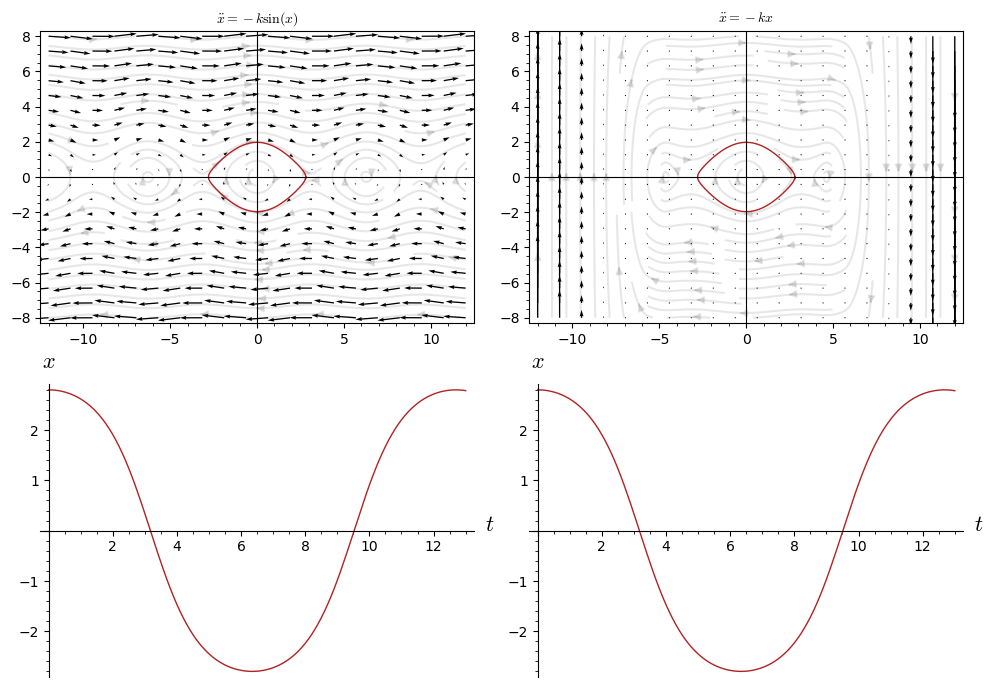

In [15]:
Anfangsbedingung = [0,2.8,0]
Endzeitpunkt=13

VektorFeld = vector([y,-k*sin(x)])
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), 
                              (x,-12,12), 
                              (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k \\sin(x)$")
OrigVektorPlot =  StreamPlot3 + FieldPlot2 + ParPlot
OrigPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick,)

VektorFeld = vector([y,-k*(1/362880*x^9 - 1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x)])
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(tuple(VektorFeld), 
                              (x,-12,12), (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k x$")
LinVektorPlot =  StreamPlot3 + FieldPlot2 + ParPlot
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)

graphics_array([OrigVektorPlot,LinVektorPlot,OrigPlot,LinPlot],nrows=2).show(figsize=(10,7))

Eine Möglichkeit, die Reibung zu berücksichtigen, ist folgende Differentialgleichung:
\begin{align*}\ddot x = -k\sin(x)+c\dot{x}.\end{align*}.

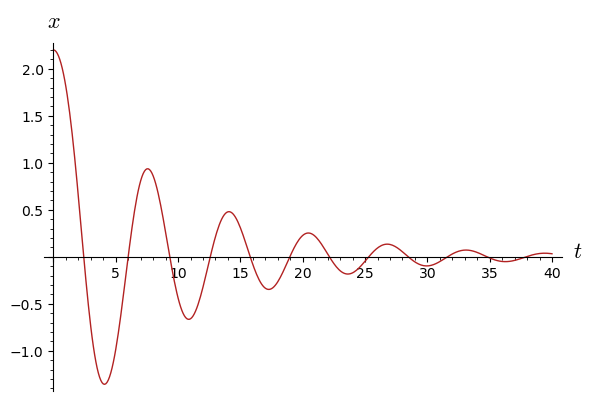

In [61]:
VektorFeld = vector([y,-k*sin(x)-0.2*y])
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt=40
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)
LinPlot.show()

Fügt man jetzt noch eine periodische Anregung hinzu, erhält man eine nicht-autonome Differentialgleichung:

\begin{align*}\ddot x = -k\sin(x)+c\dot x+d \sin(t).\end{align*}.

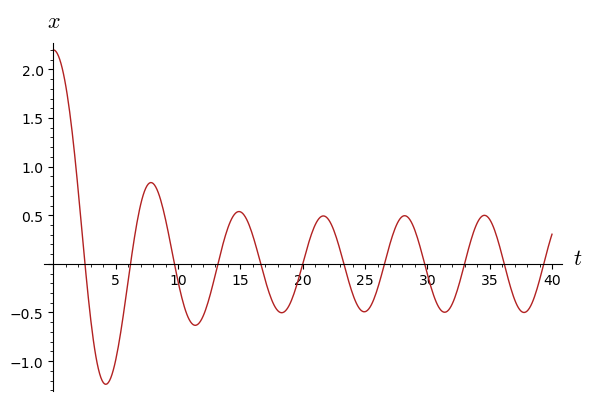

In [66]:
VektorFeld = vector([y,-k*sin(x)-0.2*y+0.1*sin(t)])
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt=40
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)
LinPlot.show()